# 캔들차트를 이용한 시각화
 * OHLC 캔들차트 활용 투자 매매 타이밍 분석


In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3

In [2]:
code=271560
pgno=2
url='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
tgurl=url.format(code,pgno)
tgurl

'https://finance.naver.com/item/sise_day.nhn?code=271560&page=2'

In [3]:
def getDB():
    dbname='stockdata.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from stockp order by skey asc'
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [4]:
res=getDB()
res[0]

['sidx', 'skey', 'sday', 'sopen', 'shigh', 'slow', 'sclose', 'svol']

In [5]:

df=pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
895,20170707,2017-07-07,87100,89700,75700,82300,1619864
894,20170710,2017-07-10,82300,88000,81000,88000,840451
893,20170711,2017-07-11,88000,88000,82700,82800,422303
892,20170712,2017-07-12,83700,84600,80000,83500,238407
891,20170713,2017-07-13,83400,84000,80800,81600,218138


In [6]:
cdf=df[['sday','sclose']].copy()


In [7]:
cdf.head()

,sday,sclose
sidx,,
895,2017-07-07,82300
894,2017-07-10,88000
893,2017-07-11,82800
892,2017-07-12,83500
891,2017-07-13,81600


In [11]:
vdf=pd.read_csv('profit_orion_sim.csv')

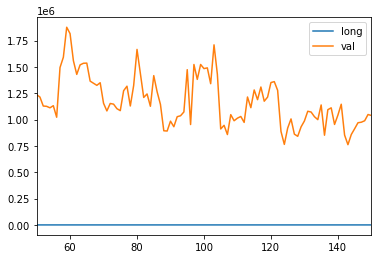

In [19]:
vdf[["long","val"]].plot()
plt.xlim(50,150)
plt.show()

In [20]:
vdf[["val"]].max()
maxrow=vdf.loc[vdf["val"]==1876300.0]
maxrow

,Unnamed: 0,short,long,val
59,59,5,8,1876300.0


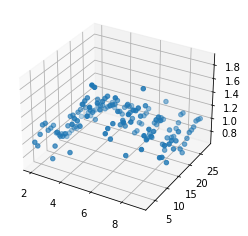

In [21]:
fig=plt.figure()
ax=fig.gca(projection="3d")
x=vdf["short"]
y=vdf["long"]
z=vdf["val"]
ax.scatter(x,y,z)
plt.show()

In [23]:
from mpl_finance import candlestick_ohlc


In [24]:
df.head()

,skey,sday,sopen,shigh,slow,sclose,svol
sidx,,,,,,,
895,20170707,2017-07-07,87100,89700,75700,82300,1619864
894,20170710,2017-07-10,82300,88000,81000,88000,840451
893,20170711,2017-07-11,88000,88000,82700,82800,422303
892,20170712,2017-07-12,83700,84600,80000,83500,238407
891,20170713,2017-07-13,83400,84000,80800,81600,218138


In [25]:
cdf=df.set_index('sday')
candf=cdf[['sopen','shigh','slow','sclose']].astype(int)
candf.head()

,sopen,shigh,slow,sclose
sday,,,,
2017-07-07,87100,89700,75700,82300
2017-07-10,82300,88000,81000,88000
2017-07-11,88000,88000,82700,82800
2017-07-12,83700,84600,80000,83500
2017-07-13,83400,84000,80800,81600


In [29]:
import datetime
from matplotlib.dates import date2num
x=np.arange(len(cdf.index))
xs=np.reshape(x,(-1,1))
xs[:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [30]:
ohlc=candf.values
ohlc
canohlc=np.hstack((xs,ohlc))
canohlc

array([[     0,  87100,  89700,  75700,  82300],
       [     1,  82300,  88000,  81000,  88000],
       [     2,  88000,  88000,  82700,  82800],
       ...,
       [   887, 135000, 137000, 131500, 136000],
       [   888, 137000, 137500, 130500, 131000],
       [   889, 131000, 135000, 130500, 133500]])

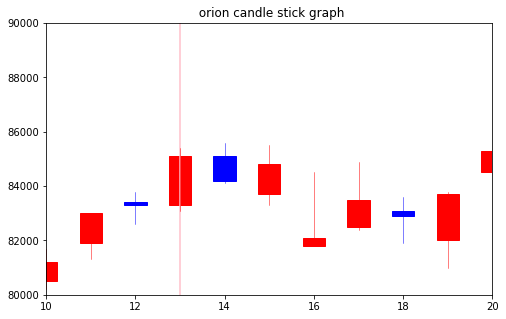

In [31]:
fig,ax=plt.subplots(figsize=(8,5))
candlestick_ohlc(ax,canohlc,width=0.5, colorup='r', colordown='b')
plt.title(" orion candle stick graph")
plt.xlim(10,20)
plt.ylim(80000,90000)
plt.vlines(13,80000,90000,color="pink")
plt.show()